### Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from scipy.linalg import eigh

### Plotting the data

(-0.5, 2.0)

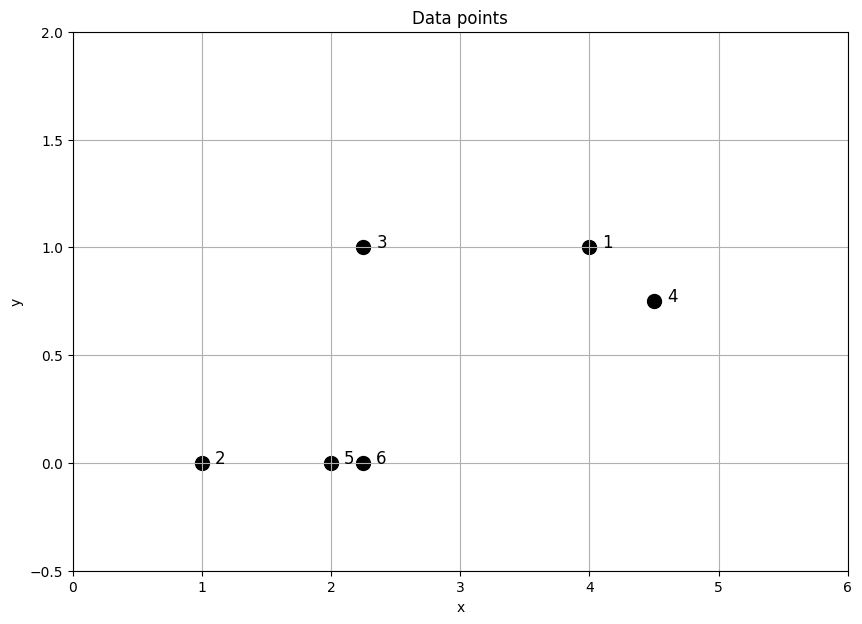

In [3]:
x_values = [4, 1, 2.25, 4.5, 2, 2.25]
y_values = [1, 0, 1, 0.75, 0, 0]
idx = [1, 2, 3, 4, 5, 6]

plt.figure(figsize=(10, 7))
plt.title('Data points')
plt.scatter(x_values, y_values, c='black', s=100)

# labels for points according to their index
for i, txt in enumerate(idx):
    plt.annotate(txt, (x_values[i]+0.1, y_values[i]), fontsize=12)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.xlim(0, 6)
plt.ylim(-0.5, 2)

### Spectral clustering

In [4]:
def spectral_clustering(L_rw, n_clusters=2):
    # compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eigh(L_rw)

    # select the n_clusters smallest eigenvectors
    selected_eigenvectors = eigenvectors[:, :n_clusters]

    # normalize the rows of the eigenvector matrix
    U = selected_eigenvectors
    row_norms = np.linalg.norm(U, axis=1, keepdims=True)
    U_normalized = U / row_norms

    # apply k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(U_normalized)

    return labels

In [5]:
# getting points
points = pd.DataFrame({'x': x_values, 'y': y_values})
points_np = points.to_numpy()

# using similarity matrix i calculated by hand
L = np.array([[1, 0, -0.5, -0.5, 0, 0],
              [0, 1, 0, 0, -0.5, -0.5],
              [-0.25, 0, 1, -0.25, -0.25, -0.25],
              [-0.5, 0, -0.5, 1, 0, 0],
              [0, -(1/3),-(1/3), 0, 1, -(1/3)],
              [0, -(1/3),-(1/3), 0, -(1/3), 1]])

# number of clusters
n_clusters = 2

labels = spectral_clustering(L, n_clusters=n_clusters)
labels


array([0, 1, 0, 0, 1, 1], dtype=int32)

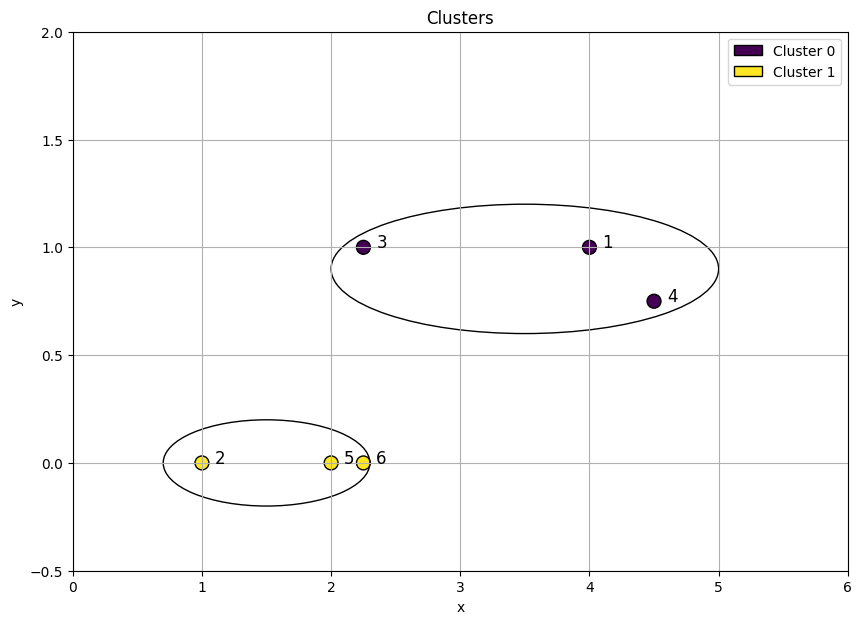

In [6]:
from matplotlib.patches import Patch
from matplotlib.patches import Ellipse

# plotting the clusters
plt.figure(figsize=(10, 7))
plt.title('Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.xlim(0, 6)
plt.ylim(-0.5, 2)
scatter = plt.scatter(points['x'], points['y'], c=labels, s=100, cmap='viridis', edgecolors='k')

# create a legend
legend_elements = [Patch(facecolor=scatter.cmap(scatter.norm(i)), edgecolor='k', label=f'Cluster {i}') for i in range(n_clusters)]
plt.legend(handles=legend_elements)

# plot a elipse around the points 2, 5, 6
ellipse = Ellipse((1.5, 0), width=1.6, height=0.4, angle=0, color='black', fill=False)
plt.gca().add_artist(ellipse)

# plot a elipse around the points 3, 1, 4
ellipse_two = Ellipse((3.5, 0.9), width=3, height=0.6, angle=0, color='black', fill=False)
plt.gca().add_artist(ellipse_two)


for i, txt in enumerate(idx):
    plt.annotate(txt, (x_values[i]+0.1, y_values[i]), fontsize=12)


# SC5 : Practical Clustering

### SpectralClustering Wrapper Class to perform all the necessary calcualtions


In [10]:
class SCWrapper:
    def __init__(self,
                 n_clusters:int,
                 dataset:pd.DataFrame,
                 delimiter:str):
        self.n_clusters = n_clusters
        self.dataset = dataset
        self.delimiter = delimiter

    def read_data(self):
        self.dataset = pd.read_csv(self.dataset, delimiter=self.delimiter)

    def show_data(self):
        print(self.dataset.head())

    def plot_data(self):
        sns.scatterplot(data=self.dataset, x='x', y='y', palette='viridis', edgecolor='k')
        plt.title('Data points')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
        plt.show()


    def perform_clustering(self):
        data = self.dataset.to_numpy()

        spectral_clustering = SpectralClustering(n_clusters=self.n_clusters, affinity='nearest_neighbors', random_state=42)
        labels = spectral_clustering.fit_predict(data)

        self.dataset['cluster'] = labels

    def plot_clusters(self):
        sns.scatterplot(data=self.dataset, x='x', y='y', hue='cluster', palette='viridis', edgecolor='k')
        plt.title('Clusters')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
        plt.show()


### Circles dataset

          x         y
0 -0.180736  0.729611
1  0.154802 -1.072998
2  0.191250 -0.979264
3  0.036093 -0.790743
4  1.058191 -0.030355


C:\Users\barte\AppData\Local\Temp\ipykernel_25840\1397477994.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=self.dataset, x='x', y='y', palette='viridis', edgecolor='k')


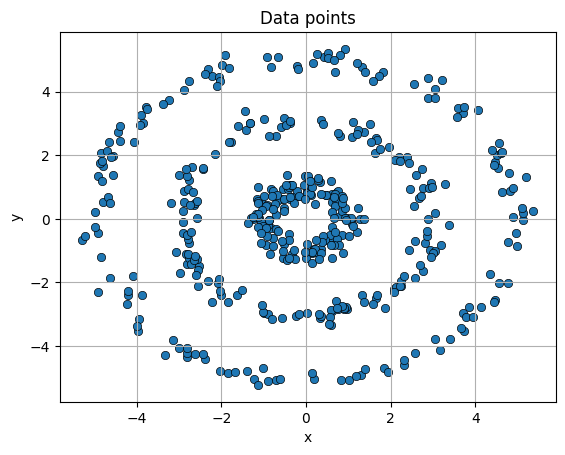

In [13]:
circle_SC = SCWrapper(n_clusters=3, dataset='circles.csv', delimiter=',')
circle_SC.read_data()
circle_SC.show_data()
circle_SC.plot_data()

C:\Users\barte\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


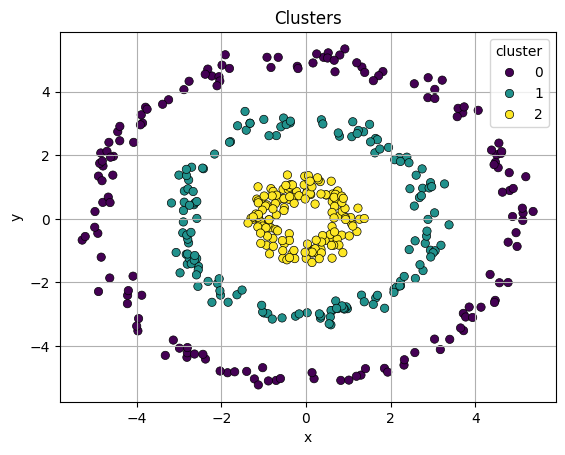

In [14]:
# perform spectral clustering
circle_SC.perform_clustering()
circle_SC.plot_clusters()

### Moons dataset

        x       y
0 -5.1226  0.7478
1 -4.6440  1.9530
2  5.8056 -2.0327
3 -3.7811  2.5167
4  4.4117 -2.6287


C:\Users\barte\AppData\Local\Temp\ipykernel_25840\1397477994.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=self.dataset, x='x', y='y', palette='viridis', edgecolor='k')


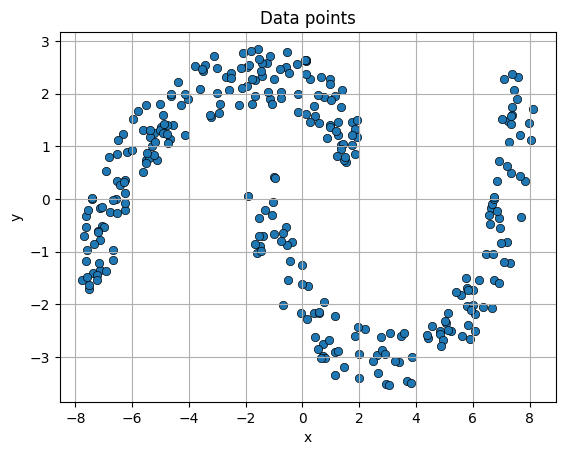

In [16]:
moons_SC = SCWrapper(n_clusters=2, dataset='moons.csv', delimiter=',')
moons_SC.read_data()
moons_SC.show_data()
moons_SC.plot_data()


C:\Users\barte\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


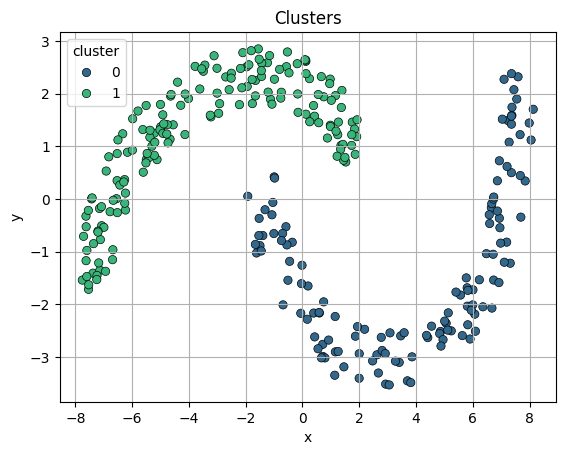

In [17]:
# perform spectral clustering
moons_SC.perform_clustering()
moons_SC.plot_clusters()

### Face dataset


In [ ]:
face_SC = SCWrapper(n_clusters=2, dataset='face.csv', delimiter=';')
